In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
%tensorflow_version 1.x
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform as sk
import tensorflow as tf

TensorFlow 1.x selected.


In [ ]:
path1 = "/content/drive/My Drive/pro_data_1/unmasked/"
path2 = "/content/drive/My Drive/pro_data_1/out/"
path5 = "/content/drive/My Drive/pro_data_1/edge_ip/"

images = []
masked = []
edge_images = []

for i in range(0,4000):
  q = plt.imread(path5+'pic_'+str(i+1)+'.jpeg')
  q = q.astype('float32')
  edge_images.append(q)
  print(i+1,end=' ')
edge_images = np.array(edge_images)/255

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

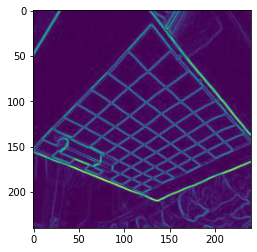

In [ ]:
plt.imshow(edge_images[3889])

In [ ]:
print(edge_images.dtype)
print(edge_images.shape)

float32
(4000, 240, 240, 3)


In [ ]:
path6 = "/content/drive/My Drive/pro_data_1/edge_val/"

edge_val_images = []

for i in range(400):
  r = plt.imread(path6+'pic_'+str(i+1)+'.jpeg')
  r = r.astype('float32')
  edge_val_images.append(r)
  print(i+1,end=' ')

edge_val_images = np.array(edge_val_images)/255

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

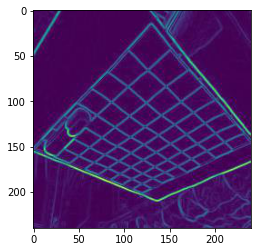

In [ ]:
plt.imshow(edge_val_images[392])

In [ ]:
print(edge_val_images.dtype)
print(edge_val_images.shape)

float32
(400, 240, 240, 3)


In [ ]:
def conv(x, w, b, stride = 1):
  x = tf.nn.conv2d(x, w, strides = [1, stride, stride, 1], padding = 'SAME')
  x = tf.nn.bias_add(x, b)
  return tf.nn.relu(x)

def conv_s(x, w, b, stride = 1):
  x = tf.nn.conv2d(x, w, strides = [1, stride, stride, 1], padding = 'SAME')
  x = tf.nn.bias_add(x, b)
  return tf.nn.sigmoid(x)

def maxpool(x, k = 2):
  x = tf.nn.max_pool(x, ksize = [1, k, k, 1], strides = [1, k, k, 1], padding = 'SAME')
  return x

"""def conv_transpose(x, w, stride = 2):
  x = tf.nn.conv2d_transpose(x, w, output_shape = [x.shape[0], (x.shape[1])*stride, (x.shape[2])*stride, x.shape[3]], strides = [1, stride, stride, 1], padding = 'SAME')
  return x"""

"def conv_transpose(x, w, stride = 2):\n  x = tf.nn.conv2d_transpose(x, w, output_shape = [x.shape[0], (x.shape[1])*stride, (x.shape[2])*stride, x.shape[3]], strides = [1, stride, stride, 1], padding = 'SAME')\n  return x"

In [ ]:
# define filters and biases
f1 = tf.Variable(tf.random.truncated_normal([3,3,3,32]))
f2 = tf.Variable(tf.random.truncated_normal([3,3,32,64]))
f3 = tf.Variable(tf.random.truncated_normal([3,3,64,128]))
f4 = tf.Variable(tf.random.truncated_normal([3,3,128,256]))
f5 = tf.Variable(tf.random.truncated_normal([3,3,256,512]))
f6 = tf.Variable(tf.random.truncated_normal([3,3,512,1024]))
f7 = tf.Variable(tf.random.truncated_normal([3,3,1024,2048]))
f8 = tf.Variable(tf.random.truncated_normal([3,3,2048,2048]))
f9 = tf.Variable(tf.random.truncated_normal([3,3,4096,2048]))
f10 = tf.Variable(tf.random.truncated_normal([3,3,2048,1024]))
f11 = tf.Variable(tf.random.truncated_normal([3,3,2048,1024]))
f12 = tf.Variable(tf.random.truncated_normal([3,3,1024,512]))
f13 = tf.Variable(tf.random.truncated_normal([3,3,1024,512]))
f14 = tf.Variable(tf.random.truncated_normal([3,3,512,256]))
f15 = tf.Variable(tf.random.truncated_normal([3,3,512,256]))
f16 = tf.Variable(tf.random.truncated_normal([3,3,256,128]))
f17 = tf.Variable(tf.random.truncated_normal([3,3,256,128]))
f18 = tf.Variable(tf.random.truncated_normal([3,3,128,64]))
f19 = tf.Variable(tf.random.truncated_normal([3,3,128,64]))
f20 = tf.Variable(tf.random.truncated_normal([3,3,64,32]))
f21 = tf.Variable(tf.random.truncated_normal([3,3,64,32]))
f22 = tf.Variable(tf.random.truncated_normal([3,3,32,3]))

b1 = tf.Variable(tf.random.truncated_normal([32]))
b2 = tf.Variable(tf.random.truncated_normal([64]))
b3 = tf.Variable(tf.random.truncated_normal([128]))
b4 = tf.Variable(tf.random.truncated_normal([256]))
b5 = tf.Variable(tf.random.truncated_normal([512]))
b6 = tf.Variable(tf.random.truncated_normal([1024]))
b7 = tf.Variable(tf.random.truncated_normal([2048]))
b8 = tf.Variable(tf.random.truncated_normal([2048]))
b9 = tf.Variable(tf.random.truncated_normal([2048]))
b10 = tf.Variable(tf.random.truncated_normal([1024]))
b11 = tf.Variable(tf.random.truncated_normal([1024]))
b12 = tf.Variable(tf.random.truncated_normal([512]))
b13 = tf.Variable(tf.random.truncated_normal([512]))
b14 = tf.Variable(tf.random.truncated_normal([256]))
b15 = tf.Variable(tf.random.truncated_normal([256]))
b16 = tf.Variable(tf.random.truncated_normal([128]))
b17 = tf.Variable(tf.random.truncated_normal([128]))
b18 = tf.Variable(tf.random.truncated_normal([64]))
b19 = tf.Variable(tf.random.truncated_normal([64]))
b20 = tf.Variable(tf.random.truncated_normal([32]))
b21 = tf.Variable(tf.random.truncated_normal([32]))
b22 = tf.Variable(tf.random.truncated_normal([3]))

ft1 = tf.Variable(tf.random.truncated_normal([3,3,2048, 2048]))
ft2 = tf.Variable(tf.random.truncated_normal([3,3,1024, 1024]))
ft3 = tf.Variable(tf.random.truncated_normal([3,3,512, 512]))
ft4 = tf.Variable(tf.random.truncated_normal([3,3,256, 256]))
ft5 = tf.Variable(tf.random.truncated_normal([3,3,128, 128]))
ft6 = tf.Variable(tf.random.truncated_normal([3,3,64, 64]))
ft7 = tf.Variable(tf.random.truncated_normal([3,3,32, 32]))

In [ ]:
#unet architechure, encoder and decoder
def unet_(image):
  image1 = conv(image, f1, b1)
  image2 = maxpool(image1)
  image3 = conv(image2, f2, b2)
  image4 = maxpool(image3)
  image5 = conv(image4, f3, b3)
  image6 = maxpool(image5)
  image7 = conv(image6, f4, b4)
  image8 = maxpool(image7)
  image9 = conv(image8, f5, b5)
  image10 = maxpool(image9)
  image11 = conv(image10, f6, b6)
  image12 = maxpool(image11)
  image13 = conv(image12, f7, b7)
  image14 = maxpool(image13)
  image15 = conv(image14, f8, b8)

  image15 = conv_transpose(image15, ft1)
  image15 = tf.concat(values = [image13, image15], axis = 3)
  image15 = conv_s(image15, f9, b9)
  image15 = conv_s(image15, f10, b10)
  image15 = conv_transpose(image15, ft2)
  image15 = tf.concat(axis = 3,values = [image11, image15])
  image15 = conv_s(image15, f11, b11)
  image15 = conv_s(image15, f12, b12)
  image15 = conv_transpose(image15, ft3)
  image15 = tf.concat(axis = 3,values = [image9, image15])
  image15 = conv_s(image15, f13, b13)
  image15 = conv_s(image15, f14, b14)
  image15 = conv_transpose(image15, ft4)
  image15 = tf.concat(axis = 3,values = [image7, image15])
  image15 = conv_s(image15, f15, b15)
  image15 = conv_s(image15, f16, b16)
  image15 = conv_transpose(image15, ft5)
  image15 = tf.concat(axis = 3,values = [image5, image15])
  image15 = conv_s(image15, f17, b17)
  image15 = conv_s(image15, f18, b18)
  image15 = conv_transpose(image15, ft6)
  image15 = tf.concat(axis = 3,values = [image3, image15])
  image15 = conv_s(image15, f19, b19)
  image15 = conv_s(image15, f20, b20)
  image15 = conv_transpose(image15, ft7)
  image15 = tf.concat(axis = 3,values = [image1, image15])
  image15 = conv_s(image15, f21, b21)
  image15 = conv(image15, f22, b22)

  return image15

In [ ]:
#defining loss
import math
input_data = tf.placeholder(tf.float32, shape = [50, 256, 384, 3])
output_data = tf.placeholder(tf.float32)

model_output = unet_(input_data)

loss = tf.reduce_sum(tf.square(output_data - model_output)/(50*256*384*3))
optimize = tf.train.AdamOptimizer(learning_rate = 0.55*(1/(1+i))).minimize(loss)

In [ ]:
epoch = 200
with tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))) as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(epoch):
    for j in range(0,51,50):
      op,los = sess.run([optimize, loss], feed_dict = {input_data: images[j:j+50], output_data: masked[j:j+50]})
    print('epoch',i+1,'loss',los)
    if i==(epoch-1):
      out_ = unet_(images)
      out_ = np.array(sess.run(out_))
      out_val = unet_(val_images)
      out_val = np.array(sess.run(out_val))

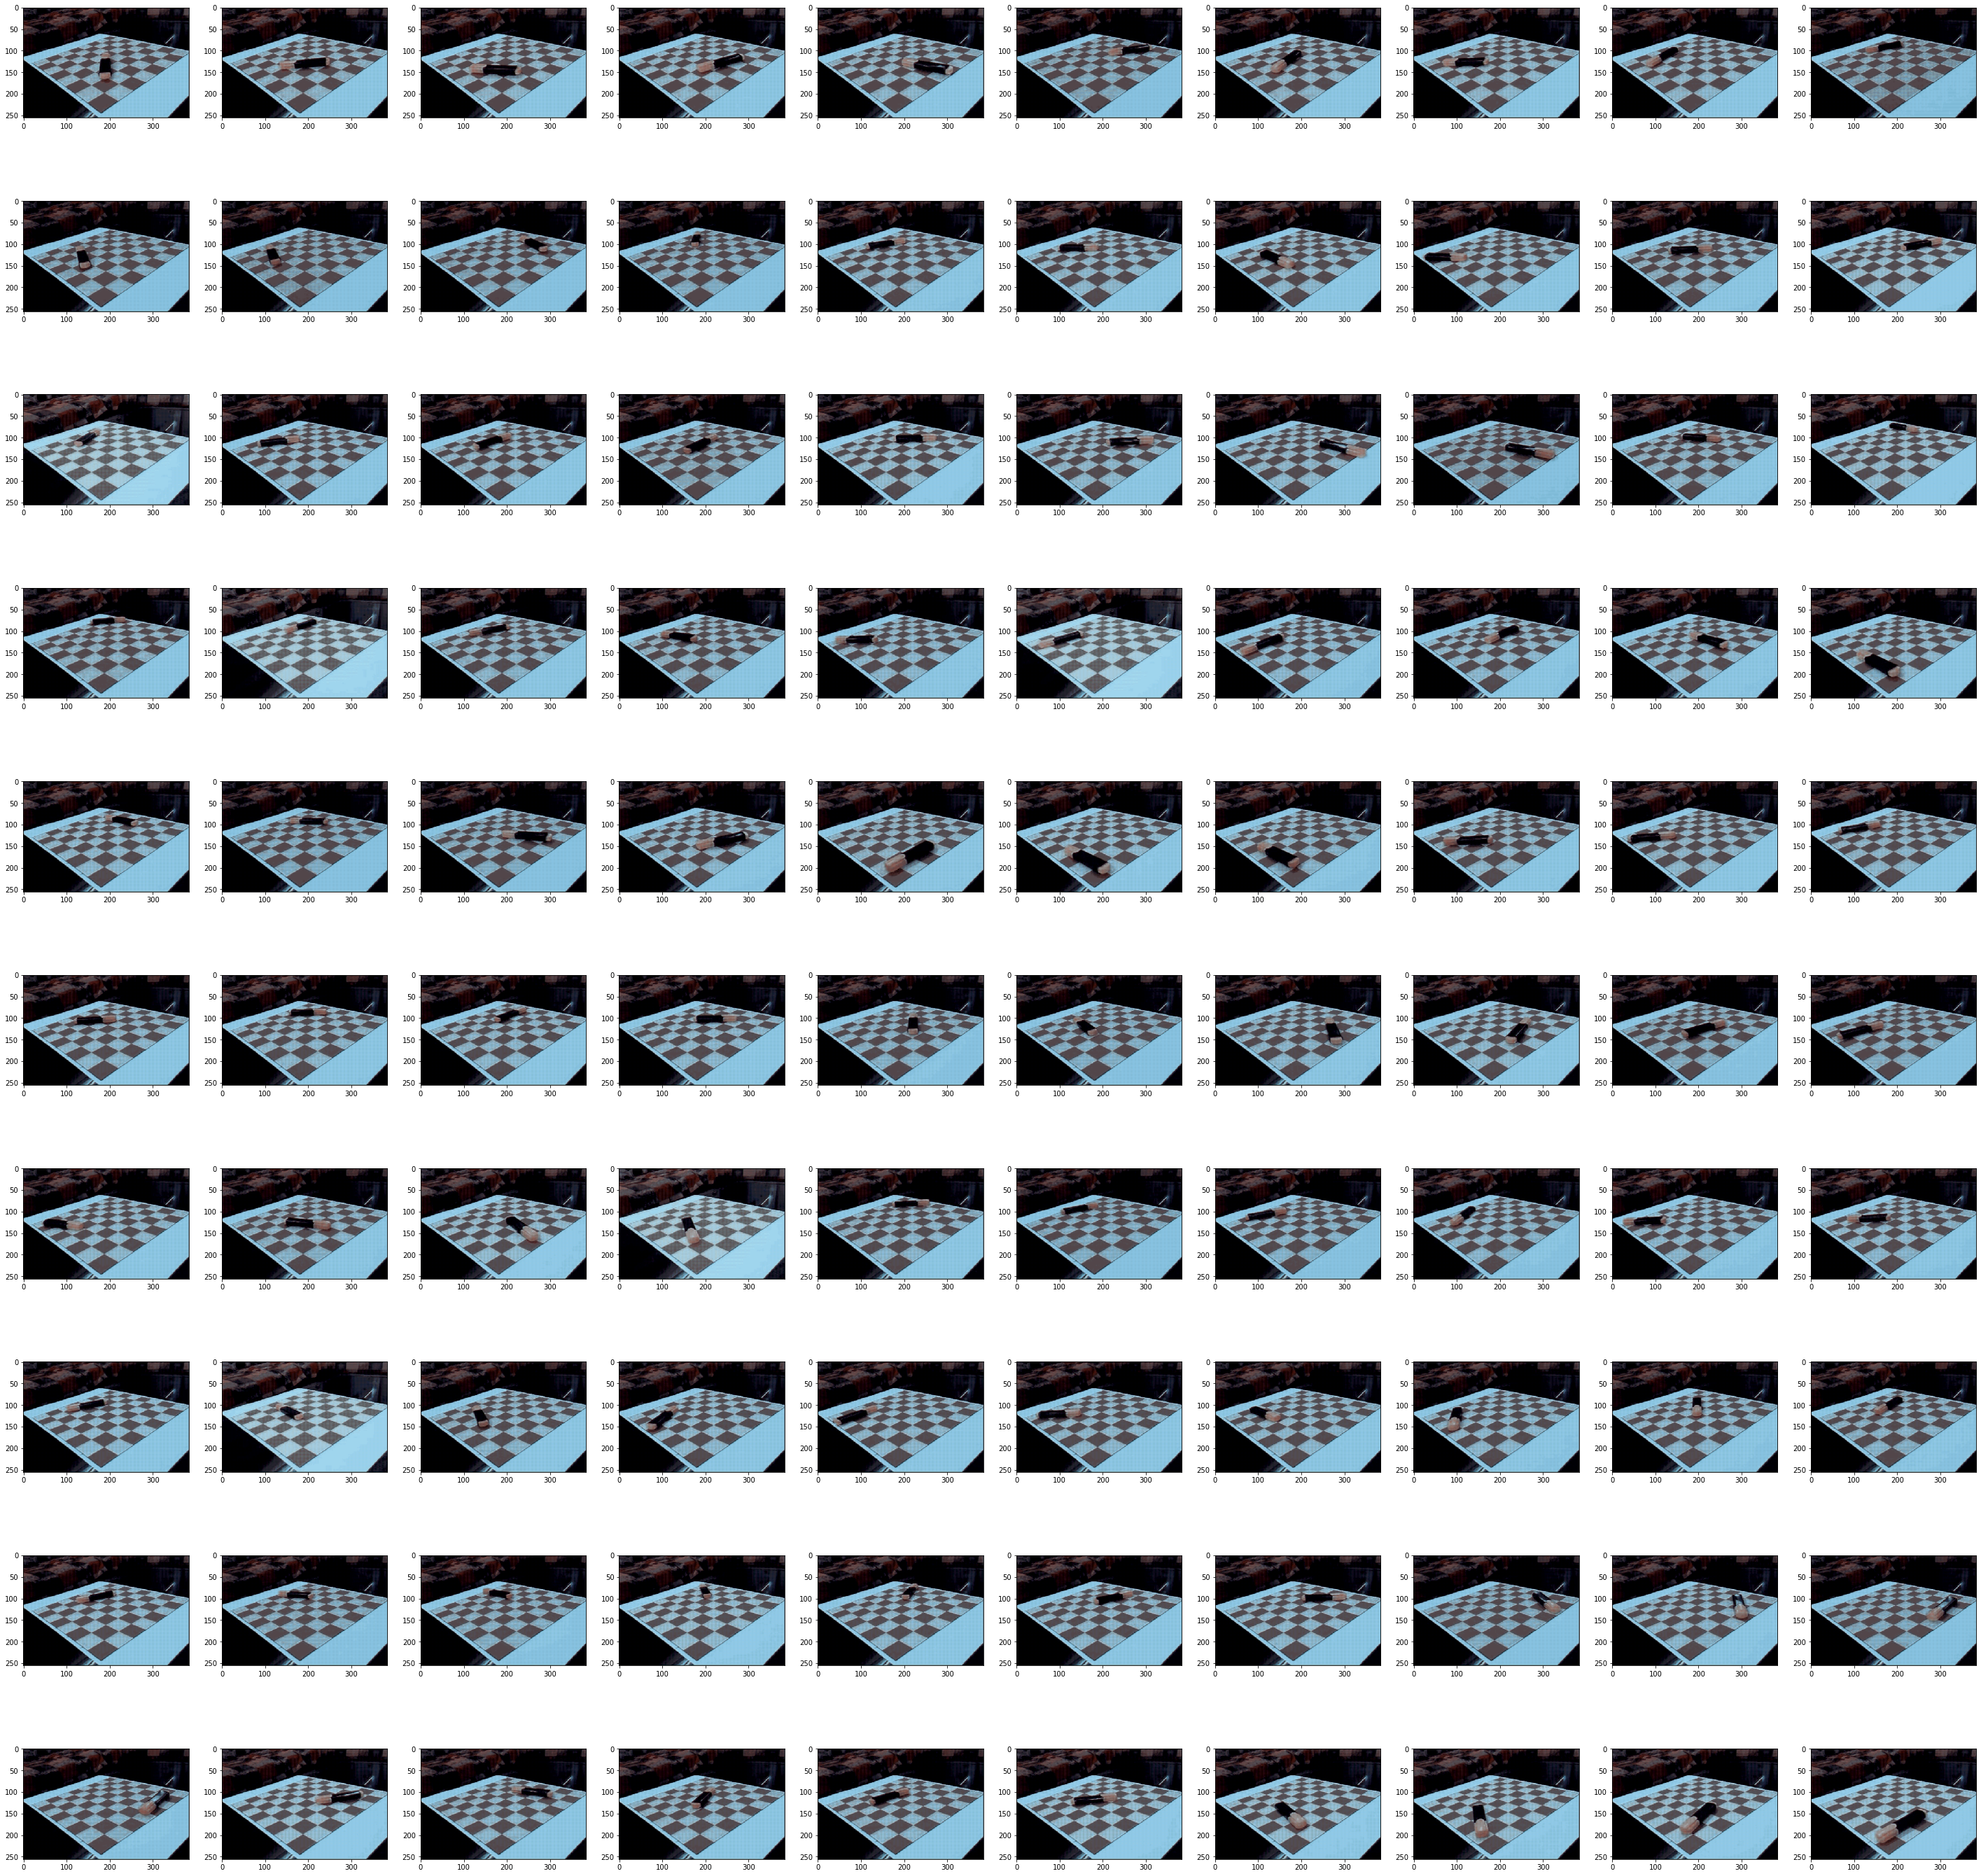

In [ ]:
plt.figure(figsize = (50,50))
for c in range(100):
  plt.subplot(10,10,c+1)
  plt.imshow(out_[c].reshape(256,384,3).astype('uint8'))

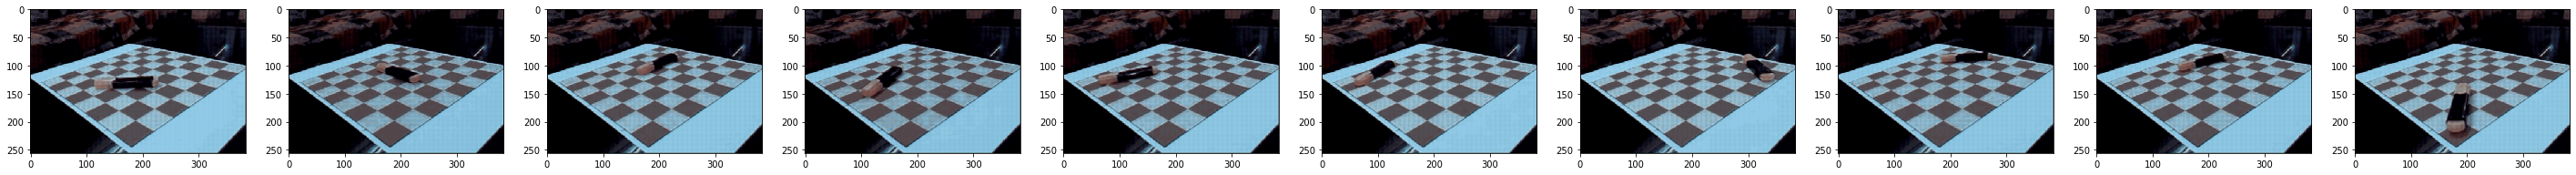

In [ ]:
plt.figure(figsize = (50,5))
for c in range(10):
  plt.subplot(1,10,c+1)
  plt.imshow(out_val[c].reshape(256,384,3).astype('uint8'))

In [ ]:
coord = [[ 6.,  6.],
       [ 6.,  6.],
       [ 6.,  4.],
       [ 4.,  8.],
       [ 3.,  7.],
       [ 6., 12.],
       [ 8.,  6.],
       [10.,  4.],
       [12.,  6.],
       [12., 10.],
       [ 9.,  5.],
       [11.,  4.],
       [ 6., 12.],
       [13., 11.],
       [12.,  8.],
       [12.,  6.],
       [ 9.,  4.],
       [12.,  2.],
       [ 9.,  7.],
       [ 6., 12.],
       [ 8.,  6.],
       [ 6.,  9.],
       [ 8.,  6.],
       [10.,  9.],
       [ 9., 13.],
       [12.,  7.],
       [13.,  4.],
       [12.,  6.],
       [10.,  5.],
       [10., 11.],
       [13., 13.],
       [12., 11.],
       [12.,  9.],
       [11.,  6.],
       [12.,  4.],
       [12.,  4.],
       [10.,  4.],
       [ 8., 10.],
       [ 6.,  8.],
       [ 4.,  2.],
       [ 9., 12.],
       [11., 11.],
       [ 4.,  9.],
       [ 3.,  8.],
       [ 2.,  4.],
       [ 4.,  2.],
       [ 5.,  2.],
       [ 8.,  4.],
       [11.,  3.],
       [14.,  5.],
       [11.,  7.],
       [11., 11.],
       [10., 11.],
       [ 8., 10.],
       [ 7.,  9.],
       [ 9.,  6.],
       [ 3.,  9.],
       [ 4.,  8.],
       [ 6.,  7.],
       [10.,  3.],
       [11.,  3.],
       [ 7.,  6.],
       [ 5.,  7.],
       [ 7.,  5.],
       [11., 13.],
       [14.,  8.],
       [13.,  5.],
       [13.,  5.],
       [13.,  3.],
       [11.,  6.],
       [12.,  8.],
       [10.,  6.],
       [10.,  5.],
       [11.,  3.],
       [12.,  3.],
       [12.,  4.],
       [12.,  4.],
       [11.,  3.],
       [10., 10.],
       [10.,  9.],
       [11.,  9.],
       [12., 10.],
       [12., 10.],
       [12., 12.],
       [11., 13.],
       [ 8., 10.],
       [ 7., 11.],
       [ 4., 13.],
       [ 4., 12.],
       [ 2., 11.],
       [ 2., 11.],
       [ 4., 11.],
       [ 6., 12.],
       [ 8.,  8.],
       [10.,  7.],
       [ 9.,  7.],
       [ 6.,  4.],
       [ 6.,  3.],
       [ 4.,  5.],
       [ 2.,  4.],
       [ 7.,  5.],
       [ 6.,  9.],
       [ 5.,  6.],
       [ 5.,  5.],
       [12.,  9.],
       [ 3.,  6.],
       [13.,  3.],
       [ 2., 12.],
       [ 8.,  6.],
       [10.,  6.],
       [11., 11.],
       [10.,  8.],
       [ 7.,  8.],
       [ 9.,  5.],
       [ 5.,  5.],
       [13.,  4.],
       [ 4., 14.],
       [ 3., 14.],
       [ 4.,  9.],
       [ 4.,  6.],
       [ 7.,  5.],
       [11.,  6.],
       [11.,  3.],
       [11.,  1.],
       [15.,  4.],
       [13.,  8.],
       [ 8.,  8.],
       [12.,  7.],
       [ 6.,  5.],
       [ 4.,  1.],
       [ 3.,  3.],
       [ 6.,  7.],
       [10.,  9.],
       [11.,  6.],
       [13.,  7.],
       [11., 11.],
       [ 9., 11.],
       [ 5., 11.],
       [ 3., 11.],
       [ 6., 13.],
       [ 7.,  7.],
       [ 9.,  3.],
       [ 9.,  5.],
       [13.,  7.],
       [14.,  9.],
       [13.,  5.],
       [ 9.,  5.],
       [ 4.,  5.],
       [ 3.,  5.],
       [ 4., 10.],
       [ 3.,  6.],
       [ 3.,  3.],
       [ 5., 11.],
       [ 3.,  4.],
       [ 8.,  6.],
       [ 8.,  8.],
       [ 9.,  5.],
       [ 3.,  7.],
       [11.,  3.],
       [ 8., 11.],
       [11., 13.],
       [10.,  9.],
       [ 8.,  5.],
       [ 5.,  5.],
       [ 4., 15.],
       [ 5., 12.],
       [ 8., 13.],
       [ 8., 11.],
       [ 9., 10.],
       [ 7.,  5.],
       [ 8.,  9.],
       [ 8.,  8.],
       [ 6.,  8.],
       [10.,  3.],
       [13.,  3.],
       [11.,  5.],
       [ 9.,  7.],
       [ 7., 13.],
       [ 3., 11.],
       [ 9.,  4.],
       [12.,  8.],
       [ 8.,  9.],
       [13.,  9.],
       [13.,  5.],
       [ 9.,  4.],
       [ 6.,  4.],
       [ 4.,  4.],
       [ 7.,  7.],
       [ 7., 10.],
       [ 5.,  9.],
       [ 5.,  8.],
       [ 8.,  5.],
       [ 6.,  8.],
       [10., 13.],
       [ 8.,  9.],
       [ 9.,  3.],
       [ 5.,  3.],
       [13.,  3.],
       [12.,  5.],
       [12.,  9.],
       [ 9.,  5.],
       [ 8.,  3.],
       [ 6.,  4.],
       [ 9.,  5.],
       [ 9.,  7.],
       [11.,  7.],
       [13.,  5.],
       [12.,  9.],
       [13.,  3.],
       [ 9., 11.],
       [12., 13.],
       [ 5.,  9.],
       [ 3.,  5.],
       [ 7.,  6.],
       [ 9.,  5.],
       [ 9.,  5.],
       [11.,  3.],
       [13.,  6.],
       [ 9., 11.],
       [11., 11.],
       [ 8., 11.],
       [ 8.,  9.],
       [ 7.,  7.],
       [ 8.,  5.],
       [ 8.,  3.],
       [11.,  6.],
       [ 9.,  6.],
       [11.,  3.],
       [12., 12.],
       [12., 10.],
       [12.,  7.],
       [12.,  7.],
       [12.,  4.],
       [ 9.,  3.],
       [ 6.,  4.],
       [ 4.,  7.],
       [ 4.,  7.],
       [ 3.,  6.],
       [ 6.,  9.],
       [ 6.,  9.],
       [ 8.,  5.],
       [ 5.,  4.],
       [ 6.,  3.],
       [11.,  9.],
       [11., 12.],
       [10., 12.],
       [13., 11.],
       [14.,  6.],
       [11.,  5.],
       [11.,  5.],
       [13.,  3.],
       [13.,  3.],
       [ 9.,  3.],
       [ 8.,  6.],
       [10., 12.],
       [12., 10.],
       [10.,  4.],
       [ 6.,  8.],
       [ 4., 12.],
       [12.,  5.],
       [ 9.,  7.],
       [ 9., 11.],
       [ 5., 13.],
       [ 9.,  3.],
       [12., 10.],
       [12., 11.],
       [ 8., 13.],
       [ 8.,  4.],
       [10.,  3.],
       [10.,  7.],
       [ 8.,  7.],
       [ 6.,  5.],
       [ 6., 11.],
       [10., 12.],
       [10., 12.],
       [ 5.,  7.],
       [ 6.,  3.],
       [10.,  8.],
       [11.,  6.],
       [12.,  6.],
       [10.,  3.],
       [ 5.,  5.],
       [12., 13.],
       [11.,  9.],
       [10.,  7.],
       [ 8.,  5.],
       [ 6.,  3.],
       [ 4.,  1.],
       [ 6., 13.],
       [ 8.,  9.],
       [ 8.,  5.],
       [12.,  3.],
       [13.,  8.],
       [ 9.,  9.],
       [ 5., 11.],
       [ 3., 10.],
       [ 7.,  6.],
       [11.,  4.],
       [13.,  8.],
       [ 9.,  8.],
       [ 4.,  5.],
       [ 8.,  6.],
       [ 8., 10.],
       [ 6., 12.],
       [12., 12.],
       [12.,  8.],
       [ 6.,  6.],
       [ 8.,  6.],
       [10.,  6.],
       [12.,  2.],
       [12., 10.],
       [14., 14.],
       [ 8.,  8.],
       [ 4.,  8.],
       [ 4., 12.],
       [ 5., 11.],
       [ 8., 10.],
       [10.,  4.],
       [11.,  2.],
       [14., 10.],
       [10., 11.],
       [ 8.,  9.],
       [ 6.,  7.],
       [ 4.,  5.],
       [ 4.,  3.],
       [ 8.,  3.],
       [ 8.,  9.],
       [10., 11.],
       [12., 13.],
       [12.,  7.],
       [12.,  3.],
       [10.,  1.],
       [ 4.,  9.],
       [ 4., 13.],
       [12., 13.],
       [12.,  9.],
       [12.,  7.],
       [12.,  3.],
       [ 8.,  7.],
       [ 8., 11.],
       [ 4.,  9.],
       [ 4.,  5.],
       [12.,  5.],
       [12.,  9.],
       [12.,  3.],
       [ 8.,  1.],
       [ 8.,  9.],
       [ 8., 11.],
       [11., 13.],
       [ 8.,  7.],
       [11., 10.],
       [13.,  6.],
       [ 5.,  4.],
       [ 5., 11.],
       [11.,  4.],
       [11., 12.],
       [ 3., 11.],
       [13.,  6.],
       [15., 10.],
       [ 9.,  8.],
       [ 3.,  6.],
       [ 1.,  8.],
       [ 9., 12.],
       [13.,  4.],
       [15.,  8.],
       [ 9.,  8.],
       [11., 12.],
       [13.,  8.],
       [11.,  4.],
       [ 5.,  6.],
       [ 9., 10.],
       [11.,  6.],
       [13.,  4.],
       [ 9.,  4.],
       [ 3.,  4.],
       [11., 10.],
       [13., 12.],
       [11.,  8.],
       [ 5.,  8.],
       [ 3., 12.],
       [ 1., 10.],
       [ 3.,  4.],
       [ 7.,  6.],
       [11.,  8.],
       [13., 10.],
       [15.,  6.],
       [13., 12.],
       [11., 12.],
       [ 7., 10.],
       [ 3.,  8.],
       [13.,  4.],
       [ 7.,  8.],
       [11., 10.],
       [13., 12.],
       [ 3.,  8.],
       [ 7.,  6.],
       [ 3.,  6.],
       [13.,  8.],
       [ 9., 12.],
       [ 7.,  4.],
       [ 8.,  6.],
       [ 8., 10.],
       [12.,  8.],
       [12., 12.],
       [ 4., 12.],
       [ 4.,  8.],
       [ 4.,  4.],
       [10.,  6.],
       [10.,  4.],
       [12.,  6.],
       [ 8., 12.],
       [ 4., 10.],
       [14.,  8.],
       [12., 10.],
       [10.,  8.],
       [ 4.,  4.],
       [ 6.,  8.],
       [10.,  4.],
       [14.,  8.],
       [12.,  4.],
       [ 4., 12.],
       [10., 12.],
       [ 2.,  8.],
       [14., 12.],
       [ 8.,  8.],
       [ 8.,  4.],
       [ 4., 12.],
       [ 4.,  8.],
       [12.,  8.],
       [10.,  4.],
       [12., 12.],
       [ 4.,  4.],
       [ 6.,  6.],
       [10.,  4.],
       [ 8.,  2.],
       [14.,  4.],
       [14., 12.],
       [ 6., 12.],
       [ 4., 10.],
       [ 4.,  8.],
       [ 6.,  4.],
       [ 6.,  8.],
       [ 8., 10.],
       [12., 10.],
       [ 8., 12.],
       [ 6., 12.],
       [12., 14.],
       [14.,  6.],
       [10.,  2.],
       [12.,  6.],
       [ 8.,  6.],
       [ 8.,  8.],
       [ 6., 10.],
       [ 8., 14.],
       [12., 10.],
       [14.,  6.],
       [10.,  4.],
       [10.,  6.],
       [10., 10.],
       [ 4.,  8.],
       [ 4., 10.],
       [ 4., 12.],
       [12.,  6.],
       [14.,  4.],
       [14., 10.],
       [12., 12.],
       [ 8., 10.],
       [ 8.,  6.],
       [ 4.,  6.],
       [ 8.,  2.],
       [14.,  6.],
       [ 2.,  2.],
       [ 4.,  6.],
       [ 4.,  8.],
       [ 4., 10.],
       [10., 10.],
       [10.,  8.],
       [10.,  6.],
       [12.,  6.],
       [12.,  4.],
       [ 8.,  4.],
       [ 4.,  4.],
       [ 4., 10.],
       [ 8.,  8.],
       [10.,  8.],
       [12.,  8.],
       [12.,  6.],
       [12.,  4.],
       [ 4., 12.],
       [ 6., 12.],
       [ 8., 12.],
       [10., 12.],
       [12., 12.],
       [ 4.,  6.],
       [ 6.,  4.],
       [10.,  4.],
       [12.,  4.],
       [12.,  8.],
       [10., 10.],
       [ 6.,  8.],
       [ 6.,  6.],
       [ 6., 10.],
       [10.,  8.],
       [10.,  4.],
       [13., 10.],
       [13., 10.],
       [ 8.,  9.],
       [ 7.,  6.],
       [ 8.,  3.],
       [ 3.,  7.],
       [ 8., 13.],
       [12.,  4.],
       [10.,  5.],
       [13., 10.],
       [11.,  9.],
       [12., 12.],
       [ 8., 13.],
       [ 1.,  4.],
       [ 4., 13.],
       [ 7.,  6.],
       [10.,  4.],
       [ 2., 12.],
       [ 6., 12.],
       [10.,  2.],
       [12.,  3.],
       [13.,  6.],
       [12.,  6.],
       [ 7.,  6.],
       [ 4.,  1.],
       [ 6.,  6.],
       [ 8.,  8.],
       [ 8., 15.],
       [ 4., 15.],
       [ 9.,  4.],
       [12.,  6.],
       [ 6.,  4.],
       [13.,  5.],
       [12.,  6.],
       [10., 10.],
       [ 6.,  7.],
       [ 6.,  4.],
       [ 4.,  7.],
       [ 4., 10.],
       [ 4., 13.],
       [12., 15.],
       [13.,  6.],
       [15., 10.],
       [12.,  4.],
       [ 6.,  1.],
       [ 8., 13.],
       [ 8.,  8.],
       [ 4., 13.],
       [12.,  4.],
       [ 8.,  6.],
       [ 4.,  6.],
       [ 6., 10.],
       [ 4., 11.],
       [ 1., 11.],
       [12.,  1.],
       [11., 10.],
       [ 8., 12.],
       [ 6., 10.],
       [ 4.,  8.],
       [11.,  6.],
       [12.,  8.],
       [ 8.,  8.],
       [ 4.,  4.],
       [ 6., 11.],
       [ 6., 12.],
       [12., 15.],
       [13., 12.],
       [14., 12.],
       [12.,  2.],
       [ 1., 12.],
       [ 6., 10.],
       [ 6.,  5.],
       [10.,  7.],
       [12.,  4.],
       [ 8., 11.],
       [ 9.,  8.],
       [ 6., 10.],
       [ 4., 14.],
       [14.,  8.],
       [12.,  4.],
       [14., 14.],
       [ 8.,  7.],
       [ 6.,  4.],
       [ 4.,  7.],
       [ 4., 10.],
       [ 3.,  8.],
       [ 6.,  1.],
       [ 6.,  6.],
       [12.,  3.],
       [12.,  6.],
       [ 9.,  4.],
       [ 8.,  8.],
       [12.,  6.],
       [10., 12.],
       [ 8., 15.],
       [ 8.,  9.],
       [ 6.,  4.],
       [ 6.,  3.],
       [ 8.,  9.],
       [ 8., 12.],
       [ 8., 13.],
       [ 4., 12.],
       [ 4., 11.],
       [ 3., 10.],
       [ 8.,  5.],
       [13.,  8.],
       [14., 10.],
       [12.,  4.],
       [12.,  4.],
       [10.,  7.],
       [15.,  6.],
       [14., 10.],
       [ 6., 10.],
       [ 8.,  4.],
       [ 4.,  5.],
       [ 3.,  8.],
       [ 9., 10.],
       [ 7.,  5.],
       [10.,  6.],
       [12.,  9.],
       [ 6., 12.],
       [ 8.,  3.],
       [10.,  6.],
       [12.,  6.],
       [ 8., 10.],
       [ 3., 10.],
       [ 4., 12.],
       [ 9., 12.],
       [10., 15.],
       [ 5., 12.],
       [ 4., 10.],
       [10.,  3.],
       [10.,  1.],
       [12.,  4.],
       [12.,  6.],
       [15.,  8.],
       [10.,  8.],
       [ 6.,  8.],
       [ 8.,  3.],
       [ 9.,  6.],
       [13.,  8.],
       [ 4.,  8.],
       [ 2.,  6.],
       [ 7.,  6.],
       [10.,  8.],
       [10.,  6.],
       [ 4.,  6.],
       [ 6.,  6.],
       [10.,  6.],
       [13.,  4.],
       [ 9.,  8.],
       [ 6.,  8.],
       [ 5.,  4.],
       [ 2.,  5.],
       [ 4.,  8.],
       [ 8., 10.],
       [11.,  5.],
       [10.,  7.],
       [ 7., 11.],
       [ 7.,  3.],
       [13.,  6.],
       [ 9.,  8.],
       [12.,  6.],
       [10.,  5.],
       [ 8.,  3.],
       [ 8., 10.],
       [ 3., 11.],
       [ 4.,  8.],
       [ 8., 15.],
       [11., 12.],
       [12.,  5.],
       [13.,  4.],
       [10.,  4.],
       [12., 10.],
       [ 5., 13.],
       [ 4.,  8.],
       [ 6.,  5.],
       [ 6.,  3.],
       [10.,  6.],
       [12., 10.],
       [ 8.,  7.],
       [10.,  4.],
       [ 6., 12.],
       [ 4., 12.],
       [12.,  4.],
       [14.,  8.],
       [13., 12.],
       [ 8., 13.],
       [ 4., 13.],
       [ 5.,  6.],
       [ 8.,  8.],
       [ 6., 12.],
       [ 4., 12.],
       [ 4.,  4.],
       [10.,  4.],
       [14.,  8.],
       [ 4.,  8.],
       [ 8.,  6.],
       [10.,  8.],
       [10., 12.],
       [ 4., 10.],
       [ 5.,  6.],
       [ 6.,  3.],
       [13.,  6.],
       [15., 10.],
       [14.,  8.],
       [12.,  3.],
       [12.,  6.],
       [11.,  6.],
       [10.,  6.],
       [10.,  2.],
       [ 8.,  1.],
       [ 8.,  4.],
       [ 4.,  4.],
       [ 6.,  8.],
       [ 4.,  5.],
       [ 3.,  8.],
       [ 4.,  8.],
       [ 4., 12.],
       [ 4.,  3.],
       [ 8., 10.],
       [12., 10.],
       [ 8.,  6.],
       [ 4.,  8.],
       [ 8.,  4.],
       [11.,  6.],
       [13., 12.],
       [ 8.,  8.],
       [ 7.,  7.],
       [ 5., 11.],
       [ 5.,  9.],
       [ 4.,  7.],
       [ 5., 13.],
       [ 8., 12.],
       [ 8.,  4.],
       [12.,  4.],
       [13.,  6.],
       [12.,  6.],
       [12.,  8.],
       [12., 12.],
       [12., 13.],
       [10., 15.],
       [12., 12.],
       [10.,  8.],
       [ 4.,  4.],
       [ 3.,  4.],
       [ 4., 10.],
       [ 3., 10.],
       [ 4., 13.],
       [ 6., 12.],
       [ 6., 10.],
       [ 4., 10.],
       [ 8.,  6.],
       [10.,  4.],
       [ 6.,  4.],
       [ 4.,  2.],
       [12.,  4.],
       [ 8.,  2.],
       [10., 13.],
       [10., 10.],
       [12.,  8.],
       [13., 10.],
       [12., 12.],
       [12.,  7.],
       [12.,  4.],
       [ 8.,  8.],
       [ 8., 12.],
       [ 6., 10.],
       [ 4.,  8.],
       [ 3.,  8.],
       [ 1.,  4.],
       [ 4., 13.],
       [ 4., 12.],
       [ 4., 12.],
       [ 4., 10.],
       [10.,  8.],
       [12.,  8.],
       [14.,  8.],
       [12.,  4.],
       [14.,  4.],
       [14.,  8.],
       [12.,  4.],
       [10.,  2.],
       [12.,  8.],
       [12., 12.],
       [ 8.,  6.],
       [ 5.,  3.],
       [ 6.,  3.],
       [ 4., 11.],
       [ 5., 10.],
       [ 9., 10.],
       [11.,  8.],
       [12.,  6.],
       [12.,  5.],
       [10., 10.],
       [ 8.,  8.],
       [ 8., 13.],
       [ 8., 11.],
       [ 5.,  8.],
       [ 4.,  3.],
       [ 8.,  1.],
       [11.,  4.],
       [12.,  4.],
       [13.,  8.],
       [12., 10.],
       [ 8.,  8.],
       [ 5.,  3.],
       [ 4.,  6.],
       [ 3.,  8.],
       [ 4.,  8.],
       [ 4., 13.],
       [10., 15.],
       [10., 12.],
       [12.,  6.],
       [13.,  4.],
       [12.,  1.],
       [10.,  4.],
       [ 6.,  6.],
       [ 6.,  4.],
       [ 6.,  8.],
       [ 8., 14.],
       [ 6., 12.],
       [ 6.,  4.],
       [ 4.,  1.],
       [ 8.,  4.],
       [12.,  4.],
       [12.,  8.],
       [ 4.,  6.],
       [ 6., 11.],
       [ 7., 15.],
       [ 4., 11.],
       [ 8.,  8.],
       [12.,  8.],
       [10.,  5.],
       [12.,  8.],
       [ 8.,  7.],
       [ 6.,  5.],
       [ 6.,  8.],
       [ 8., 10.],
       [ 8., 13.],
       [ 8., 15.],
       [ 4., 12.],
       [ 4.,  6.],
       [10.,  4.],
       [12.,  4.],
       [12.,  6.],
       [ 8.,  8.],
       [ 8.,  8.],
       [12.,  8.],
       [ 4.,  6.],
       [ 6., 12.],
       [12.,  4.],
       [11.,  3.],
       [ 6.,  5.],
       [13., 13.],
       [12., 10.],
       [15., 10.],
       [10., 12.],
       [10., 15.],
       [12., 14.],
       [10., 10.],
       [ 8., 12.],
       [ 6., 14.],
       [ 4., 12.],
       [ 3., 12.],
       [10.,  2.],
       [12.,  5.],
       [ 6.,  2.],
       [ 5.,  5.],
       [ 4.,  4.],
       [ 4.,  5.],
       [ 8.,  6.],
       [12.,  8.],
       [ 8., 12.],
       [ 7., 12.],
       [ 4., 13.],
       [ 4., 12.],
       [ 3., 12.],
       [ 4.,  3.],
       [11.,  6.],
       [12.,  9.],
       [12.,  3.],
       [10.,  4.],
       [ 4.,  9.],
       [ 3., 12.],
       [ 4., 13.],
       [ 8., 12.],
       [10.,  8.],
       [10.,  4.],
       [ 8.,  4.],
       [ 6.,  3.],
       [ 3.,  4.],
       [11., 10.],
       [10., 13.],
       [ 8.,  6.],
       [ 8.,  5.],
       [ 7.,  8.],
       [11., 12.],
       [12.,  8.],
       [12.,  4.],
       [12.,  8.],
       [ 6.,  8.],
       [ 5.,  5.],
       [ 4., 10.],
       [ 2., 12.],
       [ 4., 15.],
       [ 4., 12.],
       [ 6.,  2.],
       [12.,  4.],
       [12.,  1.],
       [13.,  6.],
       [ 9., 10.],
       [13., 11.],
       [ 5., 12.],
       [ 4., 11.],
       [ 6.,  8.],
       [ 8.,  8.],
       [ 6.,  5.],
       [10.,  6.],
       [14.,  8.],
       [ 6., 12.],
       [ 4.,  2.],
       [ 6.,  3.],
       [ 3., 10.],
       [ 8., 12.],
       [ 6.,  4.],
       [13.,  4.],
       [12.,  6.],
       [ 3., 10.],
       [ 8.,  8.],
       [10.,  6.],
       [ 8., 12.],
       [ 6., 12.],
       [ 4.,  1.],
       [ 4., 12.],
       [ 6., 10.],
       [12., 12.],
       [12.,  8.],
       [12.,  5.],
       [12.,  4.],
       [13.,  7.],
       [13.,  8.],
       [11., 10.],
       [ 8., 12.],
       [ 4., 12.],
       [ 1., 10.],
       [ 4.,  4.],
       [ 4.,  7.],
       [ 4., 10.],
       [ 4., 11.],
       [ 6., 14.],
       [ 9., 10.],
       [10.,  6.],
       [ 8.,  6.],
       [ 6.,  3.],
       [13.,  6.],
       [15., 10.],
       [12., 12.],
       [12.,  8.],
       [12.,  4.],
       [10.,  4.],
       [12.,  6.],
       [ 8., 12.],
       [ 6.,  6.],
       [ 3., 10.],
       [ 4.,  4.],
       [ 8.,  5.],
       [ 8., 11.],
       [10.,  8.],
       [ 6.,  6.],
       [ 6.,  8.],
       [10., 10.],
       [10.,  8.],
       [14., 10.],
       [13., 10.],
       [12., 12.],
       [ 8.,  6.],
       [ 6., 12.],
       [12.,  4.],
       [ 8.,  3.],
       [ 4.,  6.],
       [ 4.,  5.],
       [12.,  8.],
       [ 8.,  7.],
       [ 4.,  4.],
       [13.,  6.],
       [15., 10.],
       [ 8., 15.],
       [ 4., 14.],
       [ 2., 11.],
       [10.,  2.],
       [12.,  4.],
       [12.,  6.],
       [ 6.,  2.],
       [10.,  6.],
       [ 8.,  8.]]
temp=[]
for i in coord:
  temp.append(i[::-1])
coord += temp
coord = np.array(coord)

temp3 = []
for k in coord:
  temp3.append(16-k[::-1])
coord = np.concatenate((coord,temp3))

val_coord = [[ 7.,  6.],
       [ 8.,  8.],
       [10., 10.],
       [ 9.,  5.],
       [12.,  5.],
       [14.,  5.],
       [ 3., 13.],
       [ 9., 13.],
       [11., 10.],
       [ 4.,  4.],
       [ 5.,  8.],
       [ 3.,  5.],
       [ 5.,  8.],
       [ 5., 13.],
       [ 4., 11.],
       [ 3.,  7.],
       [ 5.,  3.],
       [ 4.,  1.],
       [ 3.,  6.],
       [ 3.,  3.],
       [ 8.,  6.],
       [ 3., 10.],
       [ 8.,  3.],
       [12.,  6.],
       [10.,  6.],
       [ 4.,  7.],
       [ 9.,  8.],
       [13., 12.],
       [ 5.,  4.],
       [ 9.,  8.],
       [ 6.,  5.],
       [ 8.,  3.],
       [10.,  9.],
       [12.,  3.],
       [12., 13.],
       [ 4., 13.],
       [ 4.,  5.],
       [ 8.,  9.],
       [12., 13.],
       [ 6.,  5.],
       [ 8.,  8.],
       [12.,  4.],
       [12.,  8.],
       [ 6.,  8.],
       [ 4.,  4.],
       [12., 12.],
       [12.,  8.],
       [ 8., 12.],
       [12.,  4.],
       [ 8.,  4.],
       [12.,  6.],
       [ 4.,  3.],
       [ 6.,  6.],
       [12., 12.],
       [10., 11.],
       [ 9.,  8.],
       [ 8.,  5.],
       [ 5., 10.],
       [ 4., 12.],
       [ 7.,  6.],
       [ 8.,  8.],
       [ 6.,  4.],
       [12.,  6.],
       [11., 10.],
       [ 4., 11.],
       [ 2.,  8.],
       [ 4.,  4.],
       [10., 13.],
       [12.,  4.],
       [13.,  8.],
       [10., 12.],
       [10.,  8.],
       [ 8.,  6.],
       [ 8., 10.],
       [ 8., 13.],
       [12.,  8.],
       [15., 10.],
       [12., 12.],
       [10., 13.],
       [ 4., 12.],
       [ 4., 12.],
       [ 4., 15.],
       [ 4., 10.],
       [12.,  2.],
       [10.,  4.],
       [12.,  1.],
       [15.,  6.],
       [15.,  6.],
       [12.,  8.],
       [10.,  8.],
       [ 6.,  8.],
       [ 4.,  5.],
       [ 1., 12.],
       [ 6., 12.],
       [ 8., 15.],
       [10.,  4.],
       [10.,  1.],
       [12., 10.],
       [10., 15.],
       [ 4.,  4.]]
temp2 = []
for j in val_coord:
  temp2.append(j[::-1])
val_coord+=temp2

temp4 = []
val_coord = np.array(val_coord)
for l in val_coord:
  temp4.append(16-l[::-1])
val_coord = np.concatenate((val_coord,temp4))
#[[9.75, 13, 4.2],[13, 6.5, 4.2],[13, 13, 2.7],[19.5, 3.25, 2.7]]

coord = np.array(coord).astype('float32')
print(coord.shape)
val_coord = np.array(val_coord).astype('float32')
print(val_coord.shape)
#coord = np.random.randint(low = 5, high = 15,size = (500,2)).astype('float32')
#val_coord = np.random.randint(low = 4, high = 14, size = (50,2)).astype('float32')

(4000, 2)
(400, 2)


In [ ]:
#weights for dim
with tf.variable_scope('weights',reuse=tf.AUTO_REUSE, regularizer=tf.contrib.layers.l2_regularizer(0.000000009)):
  w1 = tf.Variable(tf.random.truncated_normal([3,3,3,32], stddev=0.1), 'w1')
  w2 = tf.Variable(tf.random.truncated_normal([3,3,32,64], stddev=0.1), 'w2')
  w3 = tf.Variable(tf.random.truncated_normal([3,3,64,128], stddev=0.1), 'w3')
  w4 = tf.Variable(tf.random.truncated_normal([3,3,128,256], stddev=0.1), 'w4')
  w5 = tf.Variable(tf.random.truncated_normal([3,3,256,512], stddev=0.1), 'w5')
  w6 = tf.Variable(tf.random.truncated_normal([3,3,512,1024], stddev=0.1), 'w6')
  w7 = tf.Variable(tf.random.truncated_normal([3,3,1024,2048], stddev=0.1), 'w7')
  w8 = tf.Variable(tf.random.truncated_normal([2*2*2048,1024], stddev=0.1), 'w8')
  w9 = tf.Variable(tf.random.truncated_normal([1024, 512], stddev=0.1), 'w9')
  w10 = tf.Variable(tf.random.truncated_normal([512, 256], stddev=0.1) ,'w10')
  w11 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1), 'w11')
  w12 = tf.Variable(tf.random.truncated_normal([128, 2], stddev=0.1), 'w12')
  
  c1 = tf.Variable(tf.random.truncated_normal([32], stddev=0.1), 'c1')
  c2 = tf.Variable(tf.random.truncated_normal([64], stddev=0.1), 'c2')
  c3 = tf.Variable(tf.random.truncated_normal([128], stddev=0.1), 'c3')
  c4 = tf.Variable(tf.random.truncated_normal([256], stddev=0.1), 'c4')
  c5 = tf.Variable(tf.random.truncated_normal([512], stddev=0.1), 'c5')
  c6 = tf.Variable(tf.random.truncated_normal([1024], stddev=0.1), 'c6')
  c7 = tf.Variable(tf.random.truncated_normal([2048], stddev=0.1), 'c7')
  c8 = tf.Variable(tf.random.truncated_normal([1024], stddev=0.1), 'c8')
  c9 = tf.Variable(tf.random.truncated_normal([512], stddev=0.1), 'c9')
  c10 = tf.Variable(tf.random.truncated_normal([256], stddev=0.1), 'c10')
  c11 = tf.Variable(tf.random.truncated_normal([128], stddev=0.1), 'c11')
  c12 = tf.Variable(tf.random.truncated_normal([2], stddev=0.1), 'c12')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  print(c2.eval())

In [ ]:
def dim_(sig, kp1 = 0.995, kp2 = 0.993, kp3 = 0.985, kp4 = 1, kp5 = 1, kp6 = 1, kp7 = 1):
  
  sig = conv_s(sig, w1, c1)
  sig = maxpool(sig)
  sig = conv(sig, w2, c2)
  sig = maxpool(sig)
  sig = conv(sig, w3, c3)
  sig = maxpool(sig)
  sig = conv(sig, w4, c4)
  sig = maxpool(sig)
  sig = conv(sig, w5, c5)
  sig = maxpool(sig)
  sig = conv(sig, w6, c6)
  sig = maxpool(sig)
  sig = conv(sig, w7, c7)
  sig = maxpool(sig)
  sig = tf.reshape(sig, [-1, 2*2*2048])

  sig = tf.add(tf.matmul(sig, w8), c8)
  sig = tf.nn.relu(sig)
  dp1 = tf.nn.dropout(sig, kp1)
  sig = tf.add(tf.matmul(dp1, w9), c9)
  sig = tf.nn.relu(sig)
  dp2 = tf.nn.dropout(sig, kp2)
  sig = tf.add(tf.matmul(dp2, w10), c10)
  sig = tf.nn.relu(sig)
  dp3 = tf.nn.dropout(sig, kp3)
  sig = tf.add(tf.matmul(dp3, w11), c11)
  sig = tf.nn.relu(sig)
  sig = tf.add(tf.matmul(sig, w12), c12)
  
  return sig


In [ ]:
t,v = dim_(edge_val_images[0].reshape((1,135,240,3)))
with tf.Session() as  sess:
  sess.run(tf.global_variables_initializer())
  temp = sess.run(t)
temp = temp.reshape(135,240,32)
plt.figure(figsize = (40,20))
for i in range(32):
  plt.subplot(8,4,i+1)
  plt.imshow(temp[:,:,i:i+1].reshape(135,240))

In [ ]:
signals = tf.placeholder(tf.float32)
coordinates = tf.placeholder(tf.float32)
ep = 1
signals_out = dim_(signals)
cost = tf.reduce_sum(tf.abs(signals_out - coordinates))/256
lost = cost + tf.abs(tf.losses.get_regularization_loss())
train = tf.train.GradientDescentOptimizer(learning_rate = 0.00001/ep**1.8).minimize(lost)

val_signal = tf.placeholder(tf.float32)
val_coordinates = tf.placeholder(tf.float32)
val_signal_out = dim_(val_signal, kp1 = 1, kp2 = 1, kp3 = 1, kp4 = 1, kp5 = 1, kp6 = 1, kp7 = 1)
val_cost = tf.reduce_sum(tf.abs(val_signal_out - val_coordinates))/360

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
epoch = 200
bsize = 128
dim_loss = []
val_loss = []
saver = tf.train.Saver()
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for ep in range(1,epoch+1):
    for b in range(0,700,bsize):
      _ = sess.run(train, feed_dict = {signals: edge_images[b:b + bsize], coordinates: coord[b:b + bsize]})
    cos = sess.run(cost, feed_dict = {signals: edge_images, coordinates:coord})
    dim_loss.append(cos)
    v_loss = sess.run(val_cost, feed_dict = {val_signal: edge_val_images, val_coordinates:val_coord})
    val_loss.append(v_loss)
    print('epoch',ep,'train loss',cos,'val loss',v_loss)
  saver_path = saver.save(sess, "/content/drive/My Drive/pro_data_1/mode.ckpt")
  """if st==steps :
      train_value = dim_(edge_images)
      train_value = np.array(sess.run(train_value))
      val_value = dim_(edge_val_images,kp1 = 1, kp2 = 1, kp3 = 1, kp4 = 1, kp5 = 1, kp6 = 1, kp7 = 1, is_train = False)
      val_value = np.array(sess.run(val_value))
      break"""

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/model_4000/mode.ckpt
1.3371229383680556
1.4800991058349608
[11.772916  5.10338 ] = [12.  6.]


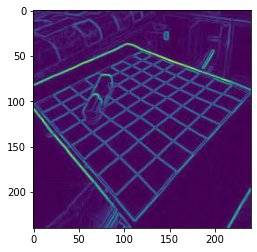

In [ ]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  saver.restore(sess, "/content/drive/My Drive/model_4000/mode.ckpt")
  #print('wts',w1.eval())
  #temp = dim_(edge_images).eval()
  #print(temp)
  #print((np.sum(np.abs(temp-coord))))
  #print(temp[589],'=',coord[589])
  #print((np.sum(np.abs(temp[19]-coord[19]))))
  temp2 = dim_(edge_val_images).eval()
  print(np.sum(np.abs(temp2[:360]-val_coord[:360]))/360)
  print(np.sum(np.abs(temp2[360:]-val_coord[360:]))/40)
  print(temp2[62],'=',val_coord[62])
  plt.imshow(edge_val_images[62])

In [ ]:
epoch = 0
bsize = 256
dim_loss = []
val_loss = []
saver = tf.train.Saver()
with tf.Session() as sess:
  saver.restore(sess, "/content/drive/My Drive/model_4000/mode.ckpt")
  for ep in range(9200,epoch+9201):
    batch_loss = []
    for b in range(0,4000,bsize):
      _ = sess.run(train, feed_dict = {signals: edge_images[b:b + bsize], coordinates: coord[b:b + bsize]})
      cos = sess.run(cost, feed_dict = {signals: edge_images[b:b+bsize], coordinates:coord[b:b+bsize]})
      batch_loss.append(cos)
    v_loss = sess.run(val_cost, feed_dict = {val_signal: edge_val_images[:360], val_coordinates:val_coord[:360]})
    train_loss = sum(batch_loss)/len(batch_loss)
    val_loss.append(v_loss)
    dim_loss.append(train_loss)
    print('epoch',ep,'train loss',train_loss,'val loss',v_loss)
  saver_path = saver.save(sess, "/content/drive/My Drive/model_4000/mode.ckpt")

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/model_4000/mode.ckpt
epoch 9200 train loss 0.8412290625274181 val loss 1.217771
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'w1' has type str, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'w1' has type str, but expected one of: int, long, bool


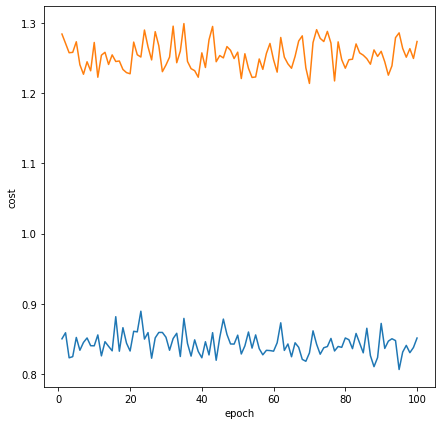

In [ ]:
#using masked data
plt.figure(figsize = (7,7))
plt.plot(list(range(1, 101)),dim_loss)
plt.plot(list(range(1, 101)),val_loss)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

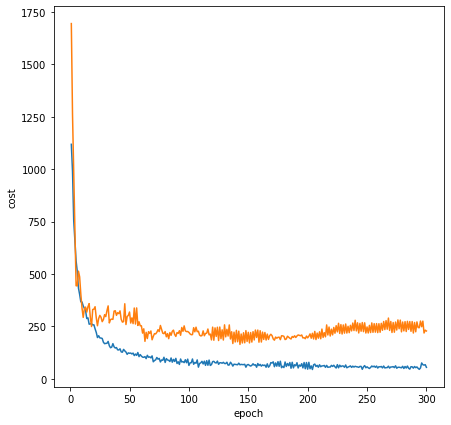

In [ ]:
#using unmasked data
plt.figure(figsize = (7,7))
plt.plot(list(range(1, 301)),dim_loss)
plt.plot(list(range(1, 301)),val_loss)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(name,filename='/content/', quality=0.5):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      //const capture = document.createElement('button');
      //capture.textContent = 'Capture';
      //div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      //await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename+name, 'wb') as f:
    f.write(binary)
  return filename+name

In [ ]:
from IPython.display import Image
import time
for i in range(0,1):
  name = 'test_pic_'+str(i+1)+'.jpeg'
  filename = take_photo(name)
  print("test pic",i+1,"taken")
  #time.sleep(4)
display(Image(filename))

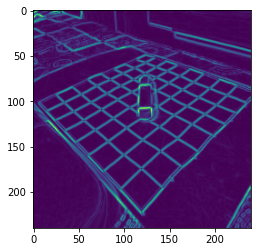

In [ ]:
path = "/content/"
from skimage.color import rgb2gray
x = plt.imread(path+"test_pic_"+str(1)+'.jpeg')
x = sk.resize(x,(240,240),anti_aliasing=True)
color = x
x = rgb2gray(x)

from scipy import ndimage
from skimage.transform import resize
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import numpy as np
kernal_h = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernal_v = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

out_1 = ndimage.convolve(x, kernal_h, mode = 'reflect')
out_2 = ndimage.convolve(x, kernal_v, mode = 'reflect')

edge_out = np.sqrt(np.square(out_1)+np.square(out_2))
import matplotlib.image as im
im.imsave("/content/test.jpeg",edge_out)
plt.imshow(edge_out)